
## Домашняя работа 1
### Кириленко Елена, группа 594


## Задача 1
$$X_1, ..., X_n \sim U(-\theta, \theta), \theta > 0$$ 
$$p_{\theta}(x) = \frac{1}{2\theta} I(x \in (-\theta, \theta))$$ 
$$f_{\theta}(X) = \frac{1}{(2\theta)^n} * I (X_{(1)}, ...., X_{(n)} \in (-\theta, \theta) ) = \frac{1}{(2\theta)^n} *I (X_{(1)} > -\theta, X_{(n)} < \theta )$$
Максимум $f_{\theta}(X)$ достигается при минимальном $\theta$, при котором полученный индикатор не обнуляется.<br>
Из условия в индикаторе имеем: $\theta > - X_{(1)} , \theta > X_{(n)}$, то есть $\theta > max(- X_{(1)}, X_{(n)})$ <br>
Тогда получим, что максимум $f_{\theta}(X)$ достигается при $\theta = max(- X_{(1)}, X_{(n)})$, то есть оценка макс. правдоподобия $\theta^* = max(- X_{(1)}, X_{(n)})$ <br> <br>
Проверка на состоятельность: <br>
$X_{(n)} \xrightarrow{п.н.} \theta$ <br>
$X_{(1)} \xrightarrow{п.н.} -\theta$ $\Rightarrow -X_{(1)} \rightarrow \theta$ п.н. <br>
$\Rightarrow \theta^* = max(- X_{(1)}, X_{(n)}) \xrightarrow{п.н.} max(\theta, \theta) \rightarrow \theta$ <br>
$\Rightarrow$ оценка является сильно состоятельной

## Задача 2
Пусть мы сгенерировали случайную величину Y с плотностью g(x). Тогда мы берем ее в качестве X с вероятностью $\frac{f(Y)}{cg(Y)}$, то есть это эквивалентно следующему: <br>
Мы генерируем случ величину Z из Bern($\frac{f(Y)}{cg(Y)}$)  (если более точно, то мы генерируем величину Z|Y, так как распределение Z зависит от Y)  и если Z = 1, то берем Y в качестве X, иначе не берем.<br>
Наша цель доказать, что распределение (Y|Z=1) будет иметь плотность f(x). (то есть, что случ величина (Y|Z=1) будет распределена так же как и X, где X понимается как случ величина из распределения с плотностью f(x)). <br>
Совпадение распределений эквивалентно тому, что для $\forall$ события $A$ : $P((Y|Z=1) \in A) = P(X \in A)$ <br>
$$P((Y|Z=1) \in A) = P(Y \in A| Z = 1) = \frac{P(Y \in A, Z = 1)}{P(Z = 1)}$$
$$P(Y \in A, Z = 1) = \int_{A} p_{Y, Z} (y, 1) dy = \int_{A} p_{Z|Y} (1, y) \; p_{Y}(y) dy$$
Теперь заметим, что $p_{Z|Y}$ это плотность(вероятность) бернуллиевского распределения, то есть величина $\frac{f(Y)}{cg(Y)}$, т.к. как замечено выше мы генерируем из распределения Бернулли величину Z|Y. Также по условию: $p_{Y}(y) = g(y)$ <br>
$$\Rightarrow P(Y \in A, Z = 1) = \int_{A} \frac{f(Y)}{cg(Y)}\; g(y) dy = \int_{A} \frac{f(Y)}{c} dy = \frac{P(X \in A)}{c}$$
Также:
$$P(Z = 1) = P(Y \in \mathbb{R}, Z = 1) =  \frac{P(X \in \mathbb{R})}{c} = \frac{1}{c}$$
<br>
$$\Rightarrow P((Y|Z=1) \in A) = c \frac{P(X \in A)}{c}  = P(X \in A)$$
То есть величины распределены одинаково с плотностью f(x). <br>
В качестве c можно взять любое c > 1 такое, что выполняется $f(x) \leq cg(x)$ <br>
(если c = 1, то получим, что f(x) = g(x) в силу того, что интегралы от плотностей должны равняться 1)


## Задача 3
В качестве распределения с конечным вторым моментом возьмем $Beta (\alpha, \beta)$, где $\alpha = 12, \beta = 50 - \alpha$
Вспомним также, что для бета распределения $EX = \frac{\alpha}{\alpha + \beta},\; DX = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta +1)}$ <br>
Чтобы посмотреть на то, сходиться ли статистика к какому-то значению, посмотрим сразу на несколько выборок. Будем рассматривать 300 выборок.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

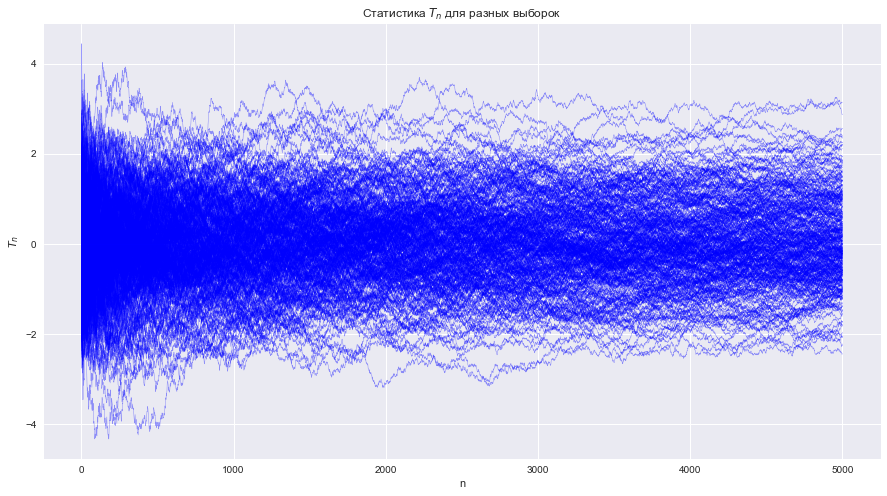

In [37]:
alpha = 12
beta = 50 - 12
size=5000
count = 300
sample = sps.beta.rvs(a=alpha,b = beta, size=(count, size))
sums = np.cumsum(sample, axis=1)
E = alpha / (alpha + beta)
D = (alpha * beta) / ((alpha + beta)**2 * (alpha +beta + 1))
T_n = (sums - np.arange(1, size+1) * E) / np.sqrt(np.arange(1, size+1) * D)
plt.figure(figsize=(15, 8))
for i in range(count):
    plt.plot(np.arange(1, size+1), T_n[i], alpha=0.4, lw=0.5, c='b')
plt.legend()
plt.title('Статистика $T_n$ для разных выборок')
plt.xlabel('n')
plt.ylabel('$T_n$')
plt.show()

Из графика можно увидеть, что $T_n$ не сходиться к какому-то определенному значению при разных реализациях выборки X. Однако из графика можно заметить, что среднее этой статистики при разных реализациях примерно равна 0. <br>
Теперь заметим, что 
$$T_n = \frac{\sum X_i - n EX_1}{\sqrt{n DX_1}} = \sqrt{n} \frac{\overline{X} - EX_1}{\sqrt{DX_1}}$$ 
По утверждению ЦПТ $T_n \rightarrow \xi \sim N(0, 1)$ <br>
То, что по ЦПТ статистика $T_n$ должна сходиться к нормальному распределению, нисколько не противоречит полученному результату, так как ЦПТ утверждает лишь то, что при больших n распределение $T_n$ будет все больше напоминать стандартное нормальное и в пределе будет иметь стандартное нормальное распределение. Однако случайная величина, распределенная стандартно нормально может принимать множество значений. Наиболее вероятным является интервал [-2, 2] и на графике как раз видим, что $T_n$ с большей вероятностью лежит именно в этом интервале. <br>
Проверим, что утверждение ЦПТ выполняется. Для этого нарисуем гистограмму статистики $T_n$ при n = count и сравним ее с плотностью нормального распределения.

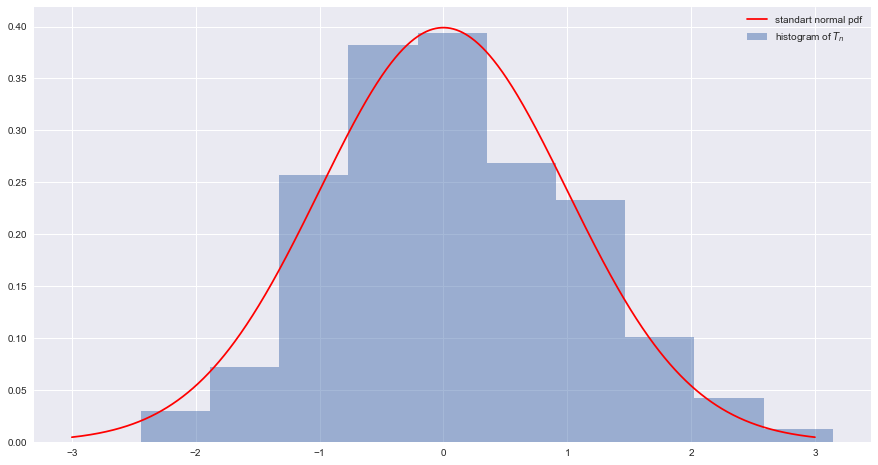

In [40]:
plt.figure(figsize=(15, 8))
plt.hist([T_n[i][-1] for i in range(count)], alpha=0.5, normed = True, label='histogram of $T_n$')
plt.plot(np.linspace(-3, 3, 1000), sps.norm(loc=0, scale = 1).pdf(np.linspace(-3, 3, 1000)), 
         c='r', label='standart normal pdf')
plt.legend()
plt.show()

Как видим, получилось очень похоже. Тем самым увидели, что ЦПТ выполняется. <br>
Также, можно было проверить нормальность, например, критерием Колмогорова, но в курсе мспс мы его не изучали, поэтому только так.

## Задача 4

Для начала найдем оценку максимального правдоподобия. Пусть есть выборка $X_1, ..., X_n$ из распределения Парето с параметром $\alpha$
$$p_{\alpha}(x) = \frac{\alpha}{x^{1+\alpha}} I(x > 1)$$ <br>
$$f_{\alpha}(X) = \frac{\alpha^n}{(\prod_{i=1}^n X_i)^ {1+\alpha}}\; I (\forall i : X_i > 1)$$
$$L_{\alpha}(X) = [n ln(\alpha) - (1+\alpha)\; \sum_{i=1}^n ln X_i] \;\;I (\forall i : X_i > 1) $$
$$L'_{\alpha}(X) = [\frac{n}{\alpha} - \sum_{i=1}^n ln X_i] \;\; I (\forall i : X_i > 1) = 0$$
$$\Rightarrow \alpha^* = \frac{n}{\sum_{i=1}^n ln X_i}$$
Для нахождения точных доверительных интервалов нужно найти статистику $G(X, \alpha)$, распределение которой не зависит от $\alpha$ и потом взять ее квантили. (метод центральной статистики). Однако такую статистику найти не удалось в связи с тем, что не получилось найти точное распределение $\alpha$<br>  
Однако, известно (утверждение с лекции) асимптотическое распределение $\alpha^*$ : $ N(\alpha, I(\alpha) ^{-1})$, где $I(\alpha)$ - информация Фишера всей выборки из n элементов: 
$$I(\alpha) = -E(\frac{\partial^2 L_{\alpha}(X)}{\partial \alpha^2}) = \frac{n}{\alpha^2}$$ 
Таким образом, $\alpha^*$ асимптотически распределена как $N(\alpha, \frac{\alpha^2}{n})$. <br>
Тогда получим, что:
$$\sqrt n (\frac{\alpha^* - \alpha}{\alpha}) \rightarrow N(0, 1)$$
Возьмем квантиль нормального распределения $z_{1 - \frac{\alpha}{2}}$ и получим доверительный интервал: 
$$[\alpha^* - z_{1 - \frac{\alpha}{2}} \frac{\alpha}{\sqrt n} ; \alpha^* + z_{1 - \frac{\alpha}{2}} \frac{\alpha}{\sqrt n}]$$ - асимптотический доверительный интервал уровня доверия $1 -\alpha$ <br>
Так как в условии не сказано какой именно доверительный интервал строить, то будем строить уровня 0.95.


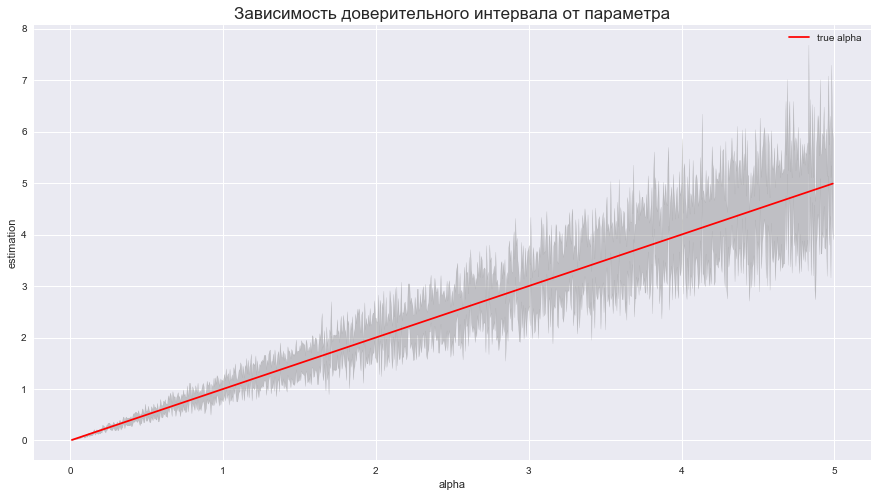

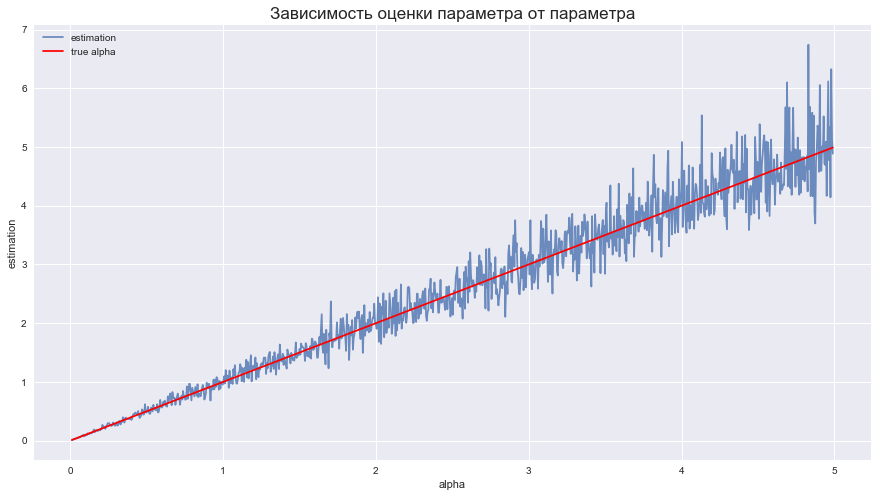

In [78]:
alphas = np.linspace(0.01, 4.99, 1000)
n = 100
samples = np.array([sps.pareto.rvs(b=alpha, size=n) for alpha in alphas])
estimations = n / np.sum(np.log(samples), axis=1)
rightboarders = estimations + (sps.norm.ppf(1 - 0.05 / 2) * alphas / np.sqrt(n))
leftboarders = estimations - (sps.norm.ppf(1 - 0.05 / 2) * alphas / np.sqrt(n))
plt.figure(figsize=(15, 8))
plt.plot(alphas, alphas, c='r', label='true alpha')
plt.fill_between(alphas, leftboarders, rightboarders, color='grey', alpha='0.4')
plt.xlabel('alpha')
plt.ylabel('estimation')
plt.legend()
plt.title('Зависимость доверительного интервала от параметра', fontsize=17)
plt.show()


plt.figure(figsize=(15, 8))
plt.plot(alphas, estimations, alpha=0.8, label='estimation')
plt.plot(alphas, alphas, c='r', label='true alpha')
plt.xlabel('alpha')
plt.ylabel('estimation')
plt.legend()
plt.title('Зависимость оценки параметра от параметра', fontsize=17)
plt.show()

Как видим, с ростом $\alpha$ длина доверительного интервала увеличивается, впрочем с ростом $\alpha$ и оценки, полученные по методу максимального правдоподобия, очень часто сильно отличаются от истинного значения параметра. Поэтому и доверительные интервалы увеличиваются.

##  Задача 5
В методе спейсингов мы рассматриваем $D_i(\theta) = F_\theta(X_{(i+1)}) - F_\theta(X_{(i)})$ <br>
В данном случае $\theta = (\alpha, \beta)$ <br>
Также мы полагаем $X_{(0)} = -\infty, \; X_{(n+1)} = \infty$ <br>
Тогда получим оценку по методу спейсингов: $(\alpha^*, \beta^*) = argmax_{\alpha, \beta} \sum_{i=0}^n ln D_i $ <br>
Найдем эту оценку для распределения Вейбулла: <br>
$$F(x) = 1 - e^{{-(\beta x)}^\alpha}$$
$$D_i(\alpha, \beta) = - e^{{-(\beta X_{(i+1)})}^\alpha} + e^{{-(\beta X_{(i)})}^\alpha}$$
Саму оценку будем находить используя функцию optimize. (Аналитически найти не получилось)<br>
Генерировать величины из распределения Вейбулла будем при помощи равномерного распределения, так как scipy.stats такого(с двумя параметрами) не нашлось.

In [79]:
from scipy.optimize import minimize

alpha = 12
beta = 50 - 12
sample_uniform = sps.uniform.rvs(loc=0, scale=1, size=100)
sample = ((- np.log(1 - sample_uniform)) ** (1/alpha)) / beta
sample_sort = np.concatenate(([-np.inf], np.sort(sample), [10**7]))

#функция, которую будем максимизировать (с минусом минимизировать)
def to_maximize(x):
    Fs = 1 - np.exp(-(x[1]*sample_sort)**x[0])
    Ds = Fs[1:] - Fs[:-1]
    Ds[Ds <= 0] = 1e-4
    ln_Ds = np.log(Ds)
    return -np.sum(ln_Ds)

result = minimize(to_maximize, [20, 40])

In [91]:
print('Истинные значения: alpha = {}, beta = {}'.format(12, 50-12))
print('Полученные оценки: alpha* = {}, beta* = {} '.format(round(result.x[0], 3), round(result.x[1], 3)))
print('Кол-во итераций метода minimize:', result.nit)

Истинные значения: alpha = 12, beta = 38
Полученные оценки: alpha* = 11.85, beta* = 37.919 
Кол-во итераций метода minimize: 13


Как видим, получилось довольно точно.